# Real Estate Firm - Property Sale Data

### About the Data

This is an assumed data for property sale details. The data consists of both the property and the customer details for the property enrolled by the dealing enterprise. The column contains values are described below :

* __id__ - Unique ID for the property 
* __building__ - Building number 
* __year-sale__ - Year of sale
* __month-sale__ - Month of sale 
* __property-type__ - Property Type
* __property-#__ - Propery number
* __area__ - Area in (ft.)
* __price__ - Price of property
* __status__ - Status of property - sold/not sold
* __customer-id__ - Unique ID for the customer
* __entity__ - Individual / Firm
* __name__ - Customer first name
* __surname__ - Customer last name
* __year__ - Customer year of birth
* __month__ - Customer month of birth
* __day__ - Customer day of birth
* __gender__ - Gender of customer
* __country__ - Counrty 
* __state__ - State
* __purpose__ - Purpose - Home / Investment
* __satisfaction-score__ - Customer Satisfaction score
* __mortgage__ - Apllied for mortgage - Yes / No
* __source__ - Source via which contacted the firm 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pandas tweaks
from IPython.display import display
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
# import data 
df_sale = pd.read_csv('data.csv',delimiter=',')

In [3]:
df_sale.head()

,id,building,year-sale,month-sale,property-type,property-#,area,price,status,customer-id,entity,name,surname,year,month,day,gender,country,state,purpose,satisfaction-score,mortgage,source
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold,C0028,Individual,Madalyn,Mercer,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold,C0027,Individual,Lara,Carrillo,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold,C0112,Individual,Donavan,Flowers,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold,C0160,Individual,Darien,Dorsey,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold,C0014,Individual,Alessandra,Perry,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [4]:
# check shape of dataset
df_sale.shape

(267, 23)

The data set contains 266 data points and has 23 columns.

In [5]:
# drop useless columns
drop = ['id','building','property-#','name','surname']
df_sale.drop(drop,axis = 1,  inplace=True)

In [7]:
# check value count of status
df_sale.status.value_counts()

 Sold     195
Name: status, dtype: int64

In [8]:
# we only want to perform analysis on sale data, hence we will consider only sold data
df_sold = df_sale[df_sale['status']==' Sold ']

In [9]:
df_sold

,year-sale,month-sale,property-type,area,price,status,customer-id,entity,year,month,day,gender,country,state,purpose,satisfaction-score,mortgage,source
0,2005.0,11.0,Apartment,743.09,246172.68,Sold,C0028,Individual,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,2005.0,10.0,Apartment,756.21,246331.90,Sold,C0027,Individual,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2007.0,7.0,Apartment,587.28,209280.91,Sold,C0112,Individual,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2007.0,12.0,Apartment,1604.75,452667.01,Sold,C0160,Individual,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,2004.0,11.0,Apartment,1375.45,467083.31,Sold,C0014,Individual,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2005.0,7.0,Apartment,743.09,210745.17,Sold,C0174,Firm,NaN,NaN,NaN,NaN,USA,California,Investment,5.0,No,Website
192,2005.0,7.0,Apartment,1160.36,331154.88,Sold,C0174,Firm,NaN,NaN,NaN,NaN,USA,California,Investment,5.0,No,Website
193,2005.0,7.0,Apartment,625.80,204434.68,Sold,C0174,Firm,NaN,NaN,NaN,NaN,USA,California,Investment,5.0,No,Website
194,2005.0,7.0,Apartment,756.21,189194.31,Sold,C0174,Firm,NaN,NaN,NaN,NaN,USA,California,Investment,5.0,No,Website


### Q1. What is the gender distrubution when considered while buying a property ?

In [10]:
# check items in gender column
df_sold['gender'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
# after carefully analyzing the gender column we found there are null values, which are for the firms 
# who bought the propert hence no gender, therefor we replace null with Firm
df_sold['gender'].fillna('FIRM',inplace=True)
df_sold['gender'].replace('F','FEMALE',inplace=True)
df_sold['gender'].replace('M','MALE',inplace=True)

In [12]:
df_sold['gender'].value_counts()

MALE      108
FEMALE     70
FIRM       17
Name: gender, dtype: int64

In [13]:
labels = df_sold['gender'].value_counts().index.tolist()
sizes = df_sold['gender'].value_counts().values.tolist()

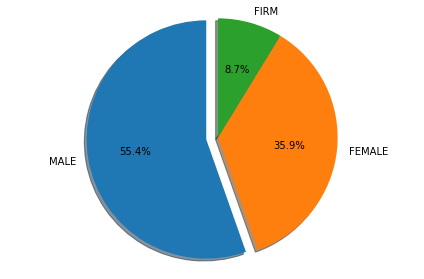

In [18]:
explode = (0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### ANSWER : 
Male accounts __55.4%__ of the sale, female - __35.9%__ and FIRM - __8.7%__ ,since we cannot account the gender of FIRM, therefor we cannot proceed with gender as a point of consideration. Plus people not often buy property with their own name, wife, son it could be anyonwe.